<a href = 'https://www.facebook.com/fea.dev/'> 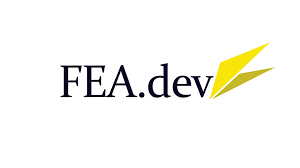<a/>

# Tópicos extras - KNN

Vamos passar por alguns pontos mais específicos que não estavam no escopo do Workshop e que possam ser úteis em alguns casos.

## Otimização

O intuito é ensinar uma opção que podemos utilizar quando buscamos otimizar nossos parâmetros do algoritmo, quando por exemplo não temos ideia de qual K possa ser o melhor, qual a métrica de distância que nos retorna a melhor acurácia e assim por diante.

### Importação e manipulação

Esses processos se dão da mesma maneira que foi no Workshop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Data.csv')
df.drop(['sl_no'], 1, inplace = True)

In [3]:
df = df[df['degree_t'] != 'Others']
df['salary'].fillna(0, inplace = True)
df.loc[df['salary'] < 240000, 'salary'] = 0
df.loc[df['salary'] >= 240000, 'salary'] = 1
df_dummy = pd.get_dummies(df)

In [4]:
X = np.array(df_dummy.drop(['salary'], 1))
y = np.array(df_dummy['salary'])
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [5]:
clf = neighbors.KNeighborsClassifier()

## Otimizando o K

Para encontrarmos o K "ideal" para o nosso projeto vamos utilizar a função GridSearchCV da sklearn:

In [6]:
from sklearn.model_selection import GridSearchCV 

Primeiro passamos uma lista com quais valores de K queremos testar, transformando logo em sequência num dicionário onde o argumento 'n_neighbors' recebe essa lista:

In [7]:
k_list = list(range(1,25))
parameters = dict(n_neighbors=k_list)

Agora atribuímos ao grid o método GridSearchCV, aonde passamos o "clf", que é o objeto que recebeu o "KNeighborsClassifier", os parâmetros que quero testar, nesse caso os diferentes valores de K, e o scoring que levaremos em conta, dessa vez vamos classificar os resultados pela acurácia de cada output. Logo após, "treinamos" o algoritmo com os atributos guardados na variável X e o target, y:

In [8]:
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y)

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Essa função testa todos os parâmetros que passamos se valendo da ideia da validação cruzada, quando passamos o argumento cv=5(que também é a opção default), o algoritmo, por meio da estratégia KFold, divide nosso dataset em 5 partes e faz 5 testes diferentes, alternando entre eles os dados de treino e os de teste.

Por meio do método .cv_results obtemos os resultados dos testes feitos, armazenaremos em um DataFrame para facilitar a manipulação:

In [9]:
scores = pd.DataFrame(grid.cv_results_)

Observe como de fato foram feitos 5 testes, cada um com uma divisão do dataset em treinamento e teste:

In [10]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036194,0.069906,0.004401,0.001201,1,{'n_neighbors': 1},0.780488,0.780488,0.707317,0.756098,0.925,0.789216,0.072210,22
1,0.000601,0.000490,0.003997,0.000633,2,{'n_neighbors': 2},0.658537,0.804878,0.609756,0.804878,0.875,0.750000,0.099542,24
2,0.000803,0.000401,0.003788,0.000743,3,{'n_neighbors': 3},0.731707,0.829268,0.756098,0.853659,0.925,0.818627,0.069226,20
3,0.001204,0.001172,0.003803,0.001165,4,{'n_neighbors': 4},0.682927,0.853659,0.609756,0.878049,0.925,0.789216,0.121569,22
4,0.000999,0.000632,0.003794,0.001323,5,{'n_neighbors': 5},0.707317,0.756098,0.780488,0.878049,0.900,0.803922,0.073212,21


Para facilitar a nossa visualização, vamos plotar os resultado da coluna "mean_test_score", que é a média dos scores obtidos para cada K nos diferentes testes, e dessa forma optaremos pelo K mais apropriado:

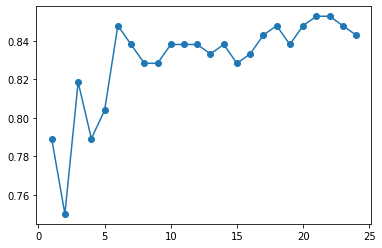

In [11]:
plt.plot(k_list,scores['mean_test_score'],marker='o')

## Otimizando a métrica que será usada no cálculo da distância

Agora vamos testar o algoritmo entre duas formas diferentes de se medir a distância entre os objetos, a métrica euclidiana e a chebyshev

In [21]:
parameters = {'metric':['euclidean','chebyshev']}

Após definirmos um dicionário com o atributo 'metric' recebendo os dois tipos que queremos testar, vamos nos valer do mesmo método utilizado anteriormente, o GridSearchCV:

In [22]:
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y)

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'chebyshev']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Note como o procedimento é o mesmo de quando otimizamos o valor de K

In [23]:
scores = pd.DataFrame(grid.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001000,9.887906e-07,0.005397,0.000491,euclidean,{'metric': 'euclidean'},0.707317,0.756098,0.780488,0.878049,0.9,0.803922,0.073212,2
1,0.001599,4.900202e-04,0.004798,0.000748,chebyshev,{'metric': 'chebyshev'},0.804878,0.853659,0.731707,0.878049,0.9,0.833333,0.059956,1


## Otimizando diferentes parâmetros ao mesmo tempo

A parte mais incrível do GridSearchCV é que podemos testar diferentes parâmetros simultaneamente, basta atribuir ao dicionário 'parameters' os diferentes argumentos que queremos variar e suas possiveis formas:

In [24]:
parameters = {'n_neighbors':k_list,'metric':['euclidean','chebyshev']}
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X,y)

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Incrível, não? Vamos passar para um DataFrame para podermos visualizar os resultados

In [25]:
scores = pd.DataFrame(grid.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,3.997090e-04,0.004797,0.001166,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.780488,0.780488,0.707317,0.756098,0.925,0.789216,0.072210,43
1,0.000999,7.231594e-07,0.010794,0.010678,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.658537,0.804878,0.609756,0.804878,0.875,0.750000,0.099542,47
2,0.001201,7.482285e-04,0.004195,0.002479,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.731707,0.829268,0.756098,0.853659,0.925,0.818627,0.069226,34
3,0.000602,4.912797e-04,0.002996,0.001102,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.682927,0.853659,0.609756,0.878049,0.925,0.789216,0.121569,43
4,0.000800,3.998042e-04,0.002798,0.000400,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.707317,0.756098,0.780488,0.878049,0.900,0.803922,0.073212,40


Observe o funcionamento do método GridSearchCV quando queremos testar diferentes parâmetros, o algoritmo preserva os n-1 argumentos e varia o que restou, nos retornando as mais variadas combinações.

Para sabermos quais os melhores parâmetros, podemos visualizar manualmente ou utilizarmos o método 'best_params_' que nos devolve o resultado com o maior 'mean_test_score'

In [26]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 21}

Optamos por utilizar o K=19 com a métrica euclidiana no Workshop original devido a acurácia média muito semelhante de quando usamos K=21 e por nos retornar um output melhor naquele caso.

## Matriz de Correlações

O método que utilizamos no Workshop para calcular as correlações entre as variáveis do nosso dataset é a opção default, o coeficiente de Pearson. Apesar de ser muito disseminado, ele não é necessariamente o mais apropriado para todas as ocasiões, nos serve bem quando tratamos relações lineares entre as variáveis mas quando estamos lidando com relações não lineares ou com um data-set com muitos outliers abrir o leque de possibilidades pode ser uma boa escolha.

### Spearman

Uma das opções que temos é nos valermos do coeficiente de correlação de postos de Spearman, a ideia dessa opção é ranquear os valores das variáveis e analisar a relação entre elas de acordo com suas posições utilizando o coeficiente de Pearson, perdendo o valor original mas mantendo a ordem.

### Exemplo

Peguemos uma amostra em que os valores de X e Y aparentam ser correlacionados mas a presença de um outlier mascara essa relação:

In [27]:
from scipy import stats #importando a biblioteca para calcularmos o coef. de Pearson

In [28]:
X = [23,65,78,42]
Y = [35,97,9306,68]
print(stats.pearsonr(X,Y))

(0.7142301413028346, 0.2857698586971654)


Agora ao invés de considerarmos os valores propriamente ditos, vamos levar em conta os ranqueamentos:

In [29]:
X = [1,3,4,2]
Y = [1,2,4,3]
print(stats.pearsonr(X,Y))

(0.8, 0.19999999999999996)


Com um coeficiente de 0.8 fica muito mais evidente essa relação né? E é essa a ideia de usarmos o Sperman, quando estamos lidando com muitos dados podemos não encontrar correlações devido a erros de medições, mas esse método nos permite desvendá-las.

### Kendall

Outra opção que vamos abordar aqui é o coeficiente de correlação de Kendall, ele é um método que também se vale do ranqueamento ao invés de considerar os valores das variáveis. A ideia é contarmos os pares concordantes(aqueles em que se X aumenta(diminui) Y aumenta(diminui)) e subtrair dos pares discordantes(aqueles em se X aumenta(diminui) Y diminui(aumenta)), dividindo o resultado pelo número total de pares.

### Exemplo 

Para fins didáticos, vamos considerar o mesmo exemplo anterior:

In [30]:
X = [23,65,78,42]
Y = [35,97,9306,68]
print(stats.pearsonr(X,Y))

(0.7142301413028346, 0.2857698586971654)


In [31]:
print(stats.kendalltau(X,Y))

KendalltauResult(correlation=1.0, pvalue=0.08333333333333333)


Como é facilmente notado, toda vez que X aumenta ou diminui, Y acompanha a tendência e isso nos diz que todos os pares de pontos são concordantes, obtendo um resultado que expressa muito melhor nossa relação né? 

## Aplicando os diferentes métodos no nosso dataset

Agora vamos mostrar os resultados para os dados do Workshop utilizando os diferentes tipos de coeficientes que aprendemos:

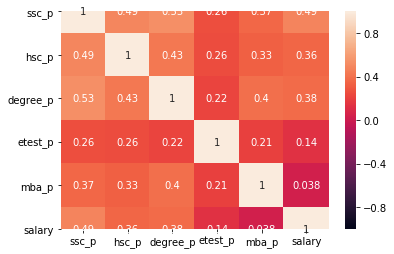

In [32]:
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1, vmax=1)
plt.show()

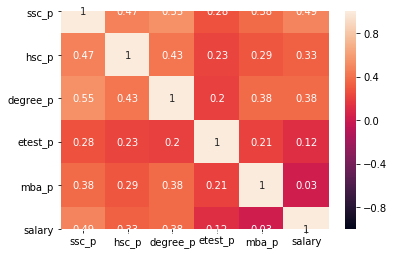

In [33]:
sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1, vmax=1)
plt.show()

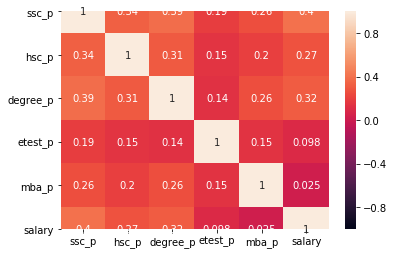

In [34]:
sns.heatmap(df.corr(method='kendall'), annot=True, vmin=-1, vmax=1)
plt.show()

Podemos ver que os valores foram diferentes, como esperado, mas no fim as mesmas variáveis se mostraram adequadas para utilizarmos no nosso modelo!!

<div align='center'><a href='https://www.facebook.com/fea.dev/'/>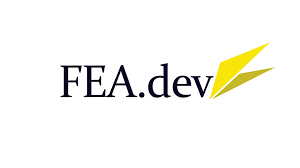<a/><div/>